## Modelos GARCH

#### Modelo ARCH (Autoregressive Conditional Heteroskedasticity)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from arch import arch_model # !pip install arch 
from arch.__future__ import reindexing # Se utiliza para eliminar warning por actualización de arch

In [2]:
precios = pd.read_excel(r"C:\Users\57317\Desktop\Universidad Nacional\Programación\Python\Curso Econometría básica con Python\Bases de datos\ECOPETROL.xls",header=1)

In [3]:
precios.head()

,Unnamed: 0,Nemotecnico,fecha,Cantidad,Volumen,Precio Cierre,Precio Mayor,Precio Medio,Precio Menor,Variacion%,Variacion Absoluta
0,NaN,ECOPETROL,2019-11-12,7872068,24675673900,3100,3190,3134.59,3100,-0.96,-30
1,NaN,ECOPETROL,2019-11-13,7650822,23805786350,3120,3130,3111.53,3035,0.65,20
2,NaN,ECOPETROL,2019-11-14,3466487,10879299015,3125,3165,3138.42,3110,0.16,5
3,NaN,ECOPETROL,2019-11-15,6849468,21571232805,3145,3175,3149.33,3125,0.64,20
4,NaN,ECOPETROL,2019-11-18,2313562,7209926510,3130,3130,3114.90,3095,-0.48,-15


In [7]:
precios = precios.drop("Unnamed: 0", axis = 1)

In [8]:
precios.head()

,Nemotecnico,fecha,Cantidad,Volumen,Precio Cierre,Precio Mayor,Precio Medio,Precio Menor,Variacion%,Variacion Absoluta
0,ECOPETROL,2019-11-12,7872068,24675673900,3100,3190,3134.59,3100,-0.96,-30
1,ECOPETROL,2019-11-13,7650822,23805786350,3120,3130,3111.53,3035,0.65,20
2,ECOPETROL,2019-11-14,3466487,10879299015,3125,3165,3138.42,3110,0.16,5
3,ECOPETROL,2019-11-15,6849468,21571232805,3145,3175,3149.33,3125,0.64,20
4,ECOPETROL,2019-11-18,2313562,7209926510,3130,3130,3114.90,3095,-0.48,-15


In [9]:
precios = precios.set_index("fecha")

In [10]:
precios

,Nemotecnico,Cantidad,Volumen,Precio Cierre,Precio Mayor,Precio Medio,Precio Menor,Variacion%,Variacion Absoluta
fecha,,,,,,,,,
2019-11-12,ECOPETROL,7872068,24675673900,3100,3190,3134.59,3100,-0.96,-30
2019-11-13,ECOPETROL,7650822,23805786350,3120,3130,3111.53,3035,0.65,20
2019-11-14,ECOPETROL,3466487,10879299015,3125,3165,3138.42,3110,0.16,5
2019-11-15,ECOPETROL,6849468,21571232805,3145,3175,3149.33,3125,0.64,20
2019-11-18,ECOPETROL,2313562,7209926510,3130,3130,3114.90,3095,-0.48,-15
...,...,...,...,...,...,...,...,...,...
2021-10-29,ECOPETROL,14648307,41694709933,2847,2880,2846.38,2830,-1.49,-43
2021-11-02,ECOPETROL,6747707,19270101764,2854,2869,2855.80,2847,0.25,7
2021-11-03,ECOPETROL,8941835,25750821675,2890,2890,2879.81,2840,1.26,36


In [17]:
model_arch = arch_model(precios["Precio Cierre"], rescale = True)
resultados = model_arch.fit(update_freq=5)
resultados.summary()

Iteration:      5,   Func. Count:     30,   Neg. LLF: 2221.5188306032787
Iteration:     10,   Func. Count:     56,   Neg. LLF: 2267.8931091420723
Iteration:     15,   Func. Count:     85,   Neg. LLF: 2214.3848415621896
Iteration:     20,   Func. Count:    109,   Neg. LLF: 2214.28489441065
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2214.2848944107327
            Iterations: 20
            Function evaluations: 109
            Gradient evaluations: 20


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:          Precio Cierre   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2214.28
Distribution:                  Normal   AIC:                           4436.57
Method:            Maximum Likelihood   BIC:                           4453.30
                                        No. Observations:                  484
Date:                Thu, Nov 11 2021   Df Residuals:                      483
Time:                        17:18:16   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu           224.0082      2.812     79.667      0.000 [2.185e+02,2.295e+02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega         13.4205      4.848      2.768  5.640e-03 [  3.918, 22.923]
alpha[1]       0.7266  7.082e-02     10.260  1.068e-24 [  0.588,  0.865]
beta[1]        0.2711  7.151e-02      3.791  1.503e-04 [  0.131,  0.411]
========================================================================

Covariance estimator: robust
"""

In [18]:
resultados.scale

0.1

In [20]:
model_arch_1 = arch_model(precios["Precio Cierre"],rescale=True,
                         mean="Constant", vol = "ARCH", p = 1, dist = "ged") 

resultados = model_arch_1.fit(update_freq=5)
resultados.summary()

Iteration:      5,   Func. Count:     31,   Neg. LLF: 4102808.736870445
Iteration:     10,   Func. Count:     61,   Neg. LLF: 2199.420762101455
Iteration:     15,   Func. Count:     86,   Neg. LLF: 2191.9978280080954
Iteration:     20,   Func. Count:    112,   Neg. LLF: 614912.7363722239
Iteration:     25,   Func. Count:    139,   Neg. LLF: 2164.960311926223
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2164.952939956521
            Iterations: 28
            Function evaluations: 153
            Gradient evaluations: 28


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Constant Mean - ARCH Model Results                            
==========================================================================================
Dep. Variable:                      Precio Cierre   R-squared:                       0.000
Mean Model:                         Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                   ARCH   Log-Likelihood:               -2164.95
Distribution:      Generalized Error Distribution   AIC:                           4337.91
Method:                        Maximum Likelihood   BIC:                           4354.63
                                                    No. Observations:                  484
Date:                            Thu, Nov 11 2021   Df Residuals:                      483
Time:                                    17:22:27   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu           217.4351      1.812    119.976      0.000 [2.139e+02,2.210e+02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega         78.2164     15.346      5.097  3.456e-07 [ 48.138,1.083e+02]
alpha[1]       0.5686  4.017e-02     14.155  1.734e-45   [  0.490,  0.647]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             7.3839      1.422      5.193  2.067e-07 [  4.597, 10.171]
========================================================================

Covariance estimator: robust
"""

### ARCH + Past values

In [21]:
model_garch_1_1 = arch_model(precios["Precio Cierre"],rescale=True,
                         mean="Constant", vol = "GARCH", p = 1, q = 1)
resultados_garch_1_1 = model_garch_1_1.fit(update_freq=5)
resultados_garch_1_1.summary()

Iteration:      5,   Func. Count:     30,   Neg. LLF: 2221.5188306032787
Iteration:     10,   Func. Count:     56,   Neg. LLF: 2267.8931091420723
Iteration:     15,   Func. Count:     85,   Neg. LLF: 2214.3848415621896
Iteration:     20,   Func. Count:    109,   Neg. LLF: 2214.28489441065
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2214.2848944107327
            Iterations: 20
            Function evaluations: 109
            Gradient evaluations: 20


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:          Precio Cierre   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2214.28
Distribution:                  Normal   AIC:                           4436.57
Method:            Maximum Likelihood   BIC:                           4453.30
                                        No. Observations:                  484
Date:                Thu, Nov 11 2021   Df Residuals:                      483
Time:                        17:25:44   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu           224.0082      2.812     79.667      0.000 [2.185e+02,2.295e+02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega         13.4205      4.848      2.768  5.640e-03 [  3.918, 22.923]
alpha[1]       0.7266  7.082e-02     10.260  1.068e-24 [  0.588,  0.865]
beta[1]        0.2711  7.151e-02      3.791  1.503e-04 [  0.131,  0.411]
========================================================================

Covariance estimator: robust
"""

### Representación Gráfica

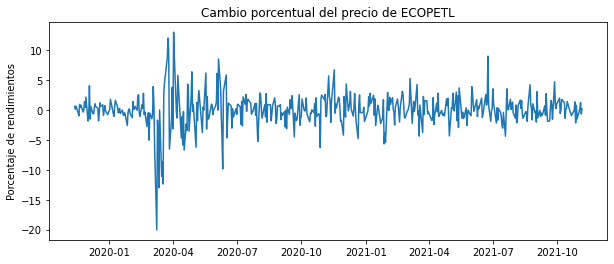

In [26]:
especie = precios["Precio Cierre"]

returns = 100 * especie.pct_change().dropna()

plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel("Porcentaje de rendimientos")
plt.title("Cambio porcentual del precio de ECOPETL");

## PACF

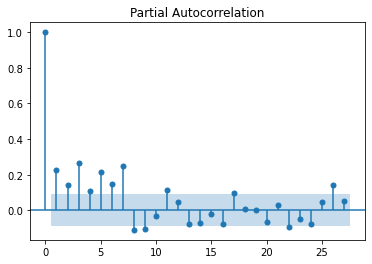

In [32]:
plot_pacf(returns**2)
plt.show()

In [47]:
model = arch_model(returns, p=3, q=0)
model_fit = model.fit(update_freq=5)
model_fit.summary()

Iteration:      5,   Func. Count:     37,   Neg. LLF: 2841.054009481722
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1079.4738456525688
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1079.4735856135117
            Iterations: 13
            Function evaluations: 89
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:          Precio Cierre   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1079.47
Distribution:                  Normal   AIC:                           2168.95
Method:            Maximum Likelihood   BIC:                           2189.85
                                        No. Observations:                  483
Date:                Thu, Nov 11 2021   Df Residuals:                      482
Time:                        18:00:44   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1102  8.558e-02      1.288      0.198 [-5.754e-02,  0.278]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          2.0865      0.410      5.093  3.518e-07    [  1.284,  2.889]
alpha[1]       0.3103      0.171      1.813  6.976e-02 [-2.507e-02,  0.646]
alpha[2]       0.2198  8.876e-02      2.476  1.327e-02  [4.583e-02,  0.394]
alpha[3]       0.2709      0.117      2.312  2.077e-02  [4.126e-02,  0.501]
===========================================================================

Covariance estimator: robust
"""

In [34]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp="off")
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [37]:
returns.index

DatetimeIndex(['2019-11-13', '2019-11-14', '2019-11-15', '2019-11-18',
               '2019-11-19', '2019-11-20', '2019-11-21', '2019-11-22',
               '2019-11-25', '2019-11-26',
               ...
               '2021-10-22', '2021-10-25', '2021-10-26', '2021-10-27',
               '2021-10-28', '2021-10-29', '2021-11-02', '2021-11-03',
               '2021-11-04', '2021-11-05'],
              dtype='datetime64[ns]', name='fecha', length=483, freq=None)

In [38]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

In [39]:
rolling_predictions

fecha
2020-05-07    3.693940
2020-05-08    1.731717
2020-05-12    2.440494
2020-05-13    2.627564
2020-05-14    3.362182
                ...   
2021-10-29    1.956838
2021-11-02    2.097847
2021-11-03    1.676244
2021-11-04    1.792355
2021-11-05    1.606378
Length: 365, dtype: float64

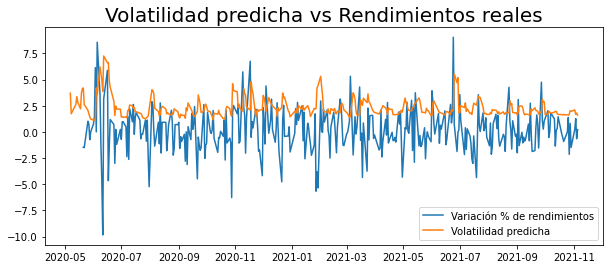

In [45]:
plt.figure(figsize=(10,4))
true = plt.plot(returns[-356:])
preds = plt.plot(rolling_predictions)
plt.title("Volatilidad predicha vs Rendimientos reales", fontsize = 20)
plt.legend(["Variación % de rendimientos", "Volatilidad predicha"]);

In [44]:
promedio =round(model_fit.params.omega,2)
promedio

2.1